# Visualize entity statistics for annotated molecular dynamics texts 📊

### 🎯 Objectives
- Retrieve a dataframe summarizing, for each annotated text, the number of entities per class: MOLECULE (`MOL`), FORCEFIELD (`FFM`), SIMULATION_TIME (`STIME`), TEMPERATURE (`TEMP`), SOFTWARE NAME (`SOFTNAME`) and SOFTWARE VERSION (`SOFTVERS`).
- Get an overview of the entities present across all annotations.

## Load libraries

In [1]:
import math
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%load_ext watermark
%watermark
%watermark --packages numpy,pandas,matplotlib,seaborn

Last updated: 2025-12-02T14:19:03.493491+01:00

Python implementation: CPython
Python version       : 3.13.9
IPython version      : 8.13.2

Compiler    : Clang 20.1.4 
OS          : Linux
Release     : 6.14.0-36-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 14
Architecture: 64bit

numpy     : 2.3.4
pandas    : 2.2.3
matplotlib: 3.10.7
seaborn   : 0.13.2



In [3]:
# Directories and files.
RESULTS_FILE = Path("../results/all_annotations_entities_count.tsv")
ANNOTATION_DIR = Path("../annotations/v2")

## Load results

In [4]:
def load_tsv(path: Path) -> pd.DataFrame:
    """Load a TSV file into a pandas DataFrame.

    Parameters
    ----------
    path : Path
        The filesystem path to the TSV file.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing the contents of the TSV file.
    """
    df = pd.read_csv(path, sep="\t")
    return df


df = load_tsv(RESULTS_FILE)
df

,filename,text_length,TEMP_nb,SOFTNAME_nb,SOFTVERS_nb,STIME_nb,MOL_nb,FFM_nb
0,figshare_9985175.json,1582,0,0,0,0,9,4
1,figshare_19657472.json,1591,0,0,0,0,20,0
2,zenodo_1488094.json,647,1,2,1,2,10,4
3,figshare_2271034.json,1435,0,0,0,1,5,0
4,figshare_9744458.json,1509,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...
375,zenodo_4451274.json,1262,0,0,0,1,2,0
376,figshare_19673947.json,1320,0,0,0,0,4,0
377,figshare_19971077.json,1500,0,0,0,0,0,0
378,figshare_3457004.json,951,0,0,0,0,7,4


## Global distribution of classes

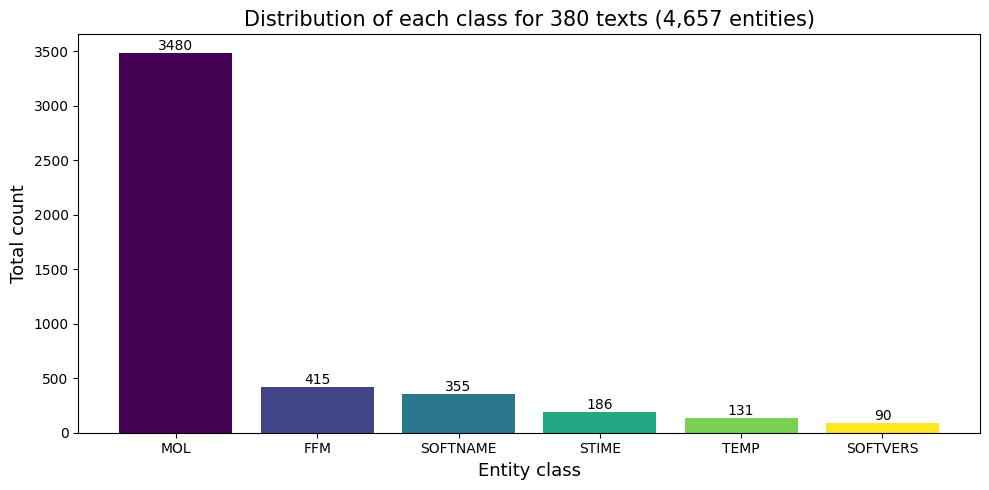

In [5]:
def plot_class_distribution(df: pd.DataFrame) -> None:
    """Plot a bar chart showing the total number of entities per class across all files.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing columns ending with ``_nb`` representing
        the counts of each entity class.
    """
    total_entities = len(df)
    cols = [col for col in df.columns if col.endswith("_nb")]
    summary = df[cols].sum().sort_values(ascending=False)

    classes = [col.replace("_nb", "") for col in summary.index]
    counts = summary.to_numpy()

    cmap = matplotlib.colormaps.get_cmap("viridis")
    colors = cmap(np.linspace(0, 1, len(classes)))

    plt.figure(figsize=(10, 5))
    x = np.arange(len(classes))
    bars = plt.bar(x, counts, color=colors)
    # Add labels
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.0f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

    plt.title(
        f"Distribution of each class for {total_entities} texts ({np.sum(counts):,} entities)",
        fontsize=15,
    )
    plt.xlabel("Entity class", fontsize=13)
    plt.ylabel("Total count", fontsize=13)
    plt.xticks(x, classes)
    plt.tight_layout()
    plt.show()


plot_class_distribution(df)

## Distribution per class

bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
ticks: [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
---
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
ticks: [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
---
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
ticks: [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
---
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
ticks: [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
---
bins: [ 

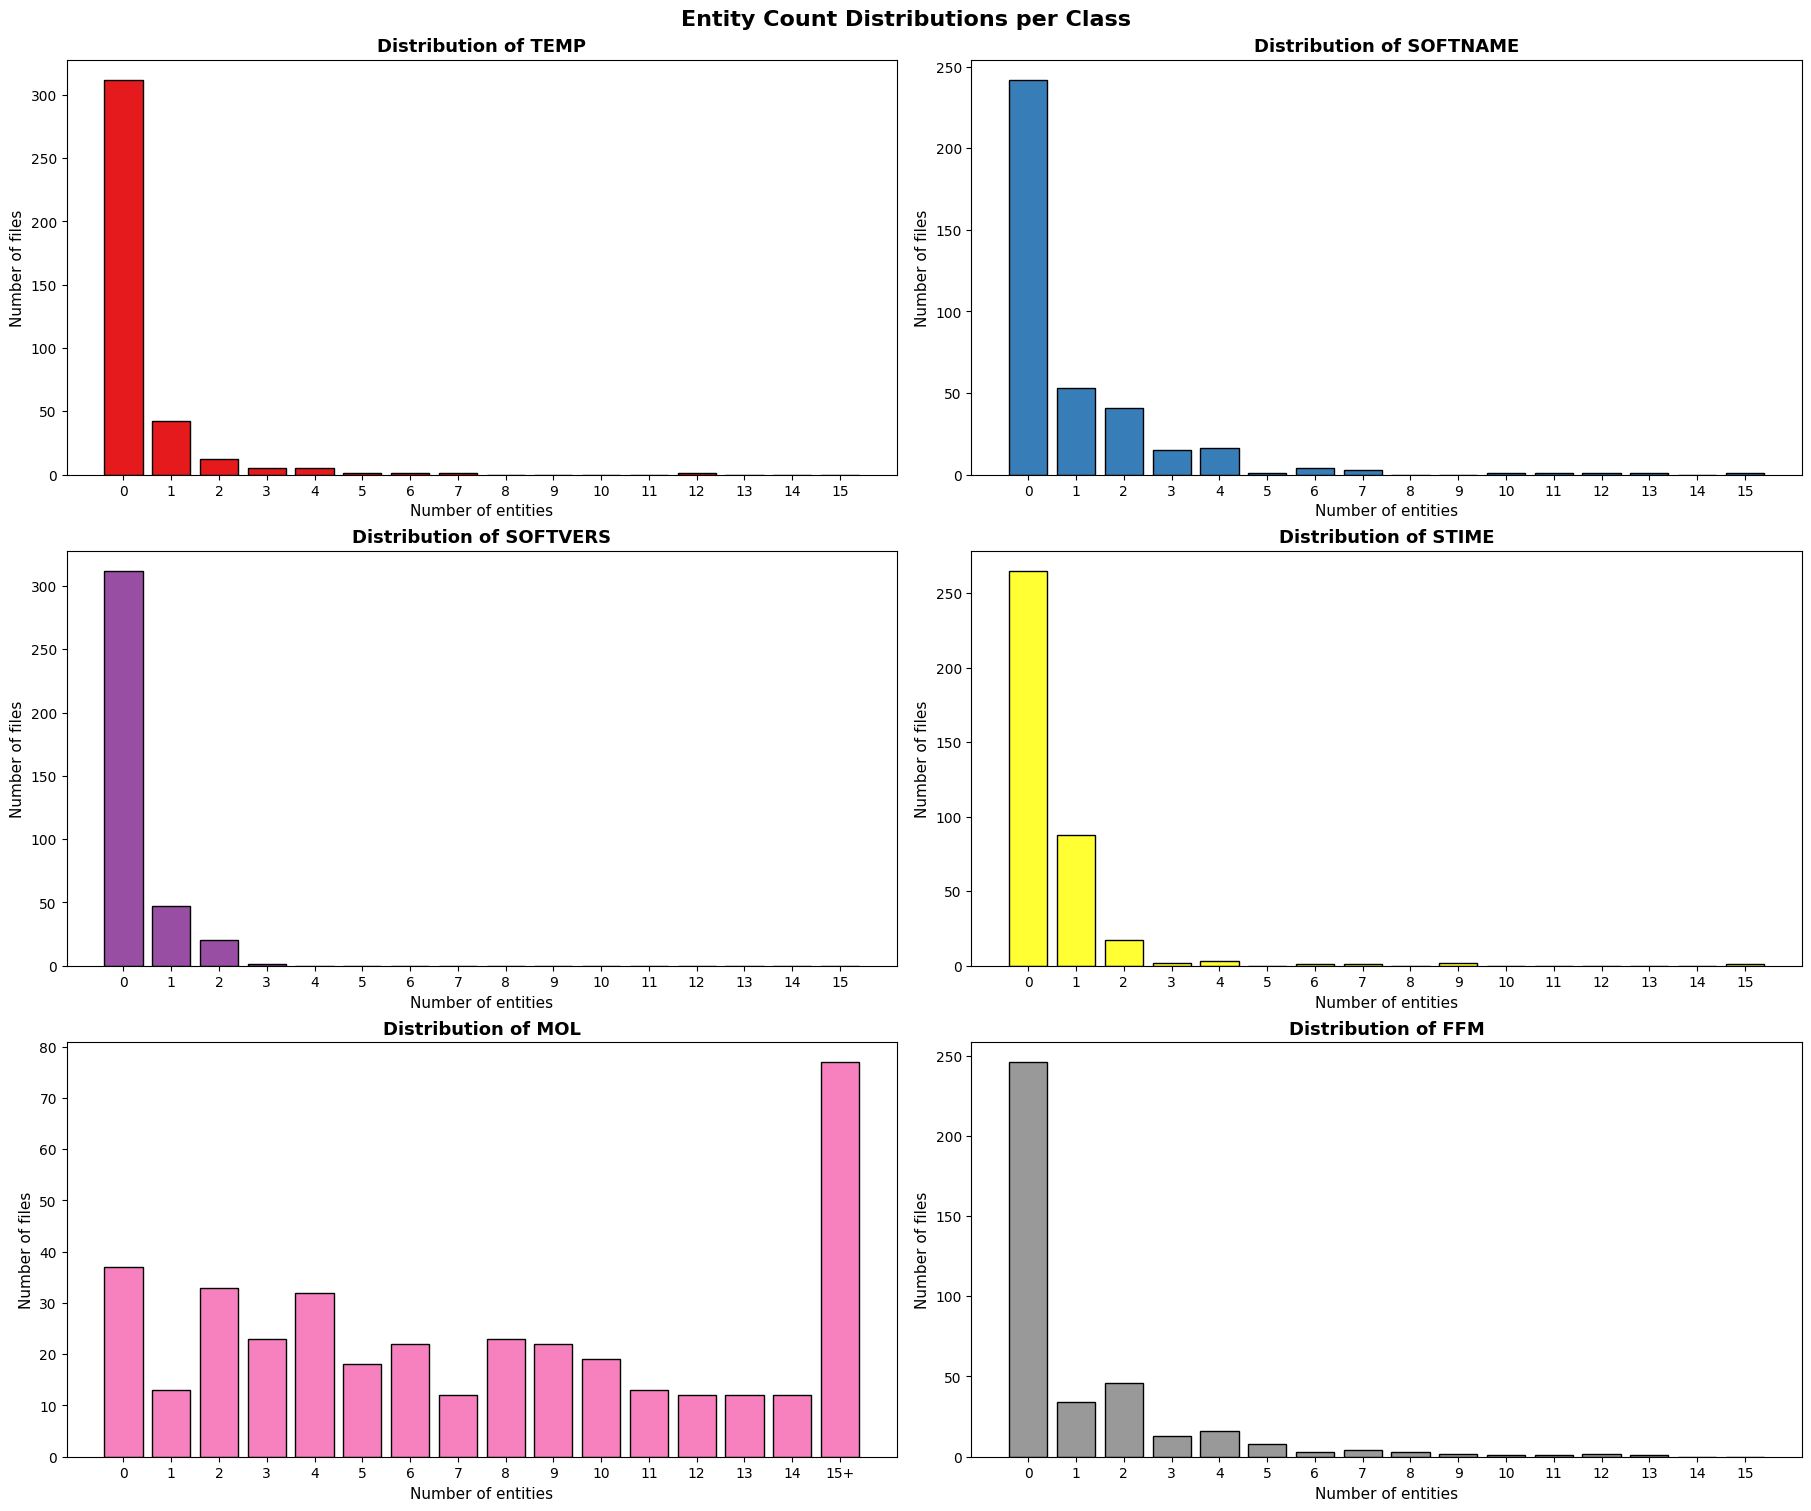

In [6]:
def plot_histograms(df: pd.DataFrame) -> None:
    """Plot histograms of entity counts per class.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing columns ending with '_nb' = counts of each entity class.
    """
    cols = [col for col in df.columns if col.endswith("_nb")]
    n_classes = len(cols)

    cmap = matplotlib.colormaps.get_cmap("Set1")
    colors = cmap(np.linspace(0, 1, n_classes))

    n_cols = 2
    n_rows = math.ceil(n_classes / n_cols)

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(18, 5 * n_rows),
        constrained_layout=True
    )
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        data = df[col]
        max_val = int(data.max())
        # Define bins, tics and labels.
        max_bins = 15
        bins = np.arange(0, max_bins+1)
        labels = [str(label) for label in np.arange(0, max_bins)]
        # Add last boundary depending on data beyond the fixed boundary.
        if max_val <= max_bins:
            bins = np.append(bins, max_bins+1)
            labels = labels + [f"{max_bins}"]
        else:
            bins = np.append(bins, max_val)
            labels = labels + [f"{max_bins}+"]
        ticks = np.arange(0, len(bins)-1) + 0.5
        # Compute histogram values first.
        heights, _= np.histogram(data, bins=bins)
        # Plot historam.
        ax.bar(
            x=ticks,
            height=heights,
            color=colors[i],
            edgecolor="black",
        )
        # Add appropriate ticks.
        ax.set_xticks(ticks=ticks, labels=labels)
        ax.set_title(
            f"Distribution of {col.replace('_nb', '')}",
            fontsize=13,
            fontweight="bold",
        )
        ax.set_xlabel("Number of entities", fontsize=11)
        ax.set_ylabel("Number of files", fontsize=11)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Entity Count Distributions per Class", fontsize=16, fontweight="bold")
    plt.show()

plot_histograms(df)